In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
df_num = pd.read_csv("/Users/giacomorossini/Desktop/IRONHACK/Laboratory/LAB11.1/lab-cleaning-numerical-data/numerical_df.csv")
df_cat = pd.read_csv("/Users/giacomorossini/Desktop/IRONHACK/Laboratory/LAB11.2/lab-cleaning-categorical-data/categorical_df_encod.csv")

In [35]:
final=df_cat.join(df_num)
final

state_Arizona  state_California  state_Nevada  state_Oregon  \
0                 0                 0             0             0   
1                 1                 0             0             0   
2                 0                 0             1             0   
3                 0                 1             0             0   
4                 0                 0             0             0   
...             ...               ...           ...           ...   
9129              0                 1             0             0   
9130              0                 1             0             0   
9131              0                 1             0             0   
9132              0                 1             0             0   
9133              0                 1             0             0   

      state_Washington  response_No  response_Yes  coverage_Basic  \
0                    1            1             0               1   
1                    0            1             0               0   
2                    0            1             0               0   
3                    0            1             0               1   
4                    1            1             0               1   
...                ...          ...           ...             ...   
9129                 0            1             0               1   
9130                 0            0             1               0   
9131                 0            1             0               0   
9132                 0            1             0               0   
9133                 0            1             0               0   

      coverage_Extended  coverage_Premium  ...  vehicle_size_Small  \
0                     0                 0  ...                   0   
1                     1                 0  ...                   0   
2                     0                 1  ...                   0   
3                     0                 0  ...                   0   
4                     0                 0  ...                   0   
...                 ...               ...  ...                 ...   
9129                  0                 0  ...                   0   
9130                  1                 0  ...                   0   
9131                  1                 0  ...                   0   
9132                  1                 0  ...                   0   
9133                  1                 0  ...                   0   

      effective_to_date  customer_lifetime_value  income  \
0               2/24/11              2763.519279   56274   
1               1/31/11              6979.535903       0   
2               2/19/11             12887.431650   48767   
3               1/20/11              7645.861827       0   
4                2/3/11              2813.692575   43836   
...                 ...                      ...     ...   
9129            2/10/11             23405.987980   71941   
9130            2/12/11              3096.511217   21604   
9131             2/6/11              8163.890428       0   
9132             2/3/11              7524.442436   21941   
9133            2/14/11              2611.836866       0   

      monthly_premium_auto  months_since_last_claim  \
0                       69                       32   
1                       94                       13   
2                      108                       18   
3                      106                       18   
4                       73                       12   
...                    ...                      ...   
9129                    73                       18   
9130                    79                       14   
9131                    85                        9   
9132                    96                       34   
9133                    77                        3   

      months_since_policy_inception  number_of_open_complaints  \
0                                 5                        

In [36]:
X = final.drop(['total_claim_amount','effective_to_date'] , axis = 1) #identifying the target and removing it from train set
Y = final['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     551.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:08:07   Log-Likelihood:                -46433.
No. Observations:                7307   AIC:                         9.296e+04
Df Residuals:                    7261   BIC:                         9.328e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
state_Arizona                     -7.3303      4.069     -1.801      0.072     -15.308       0.647
state_California                  -5.7351      3.562     -1.610      0.107     -12.718       1.248
state_Nevada                      -1.6484      4.939     -0.334      0.739     -11.331       8.034
state_Oregon                     -10.3383      3.695     -2.798      0.005     -17.581      -3.096
state_Washington                  -4.0973      5.261     -0.779      0.436     -14.411       6.217
response_No                       -3.4925      5.803     -0.602      0.547     -14.868       7.883
response_Yes                     -25.6569      5.930     -4.327      0.000     -37.281     -14.033
coverage_Basic                    -2.3530      3.263     -0.721      0.471      -8.749       4.042
coverage_Extended                -15.5792      4.048     -3.849      0.000     -23.514      -7.645
coverage_Premium                 -11.2172     10.377     -1.081      0.280     -31.560       9.125
education_Bachelor                -0.8049      3.829     -0.210      0.833      -8.310       6.700
education_College                 -7.9382      3.822     -2.077      0.038     -15.430      -0.446
education_Doctor                 -17.8336      7.245     -2.462      0.014     -32.036      -3.631
education_High School or Below     7.9890      3.894      2.052      0.040       0.356      15.622
education_Master                 -10.5618      5.560     -1.900      0.058     -21.461       0.337
employmentstatus_Disabled        -19.1837      7.009     -2.737      0.006     -32.924      -5.444
employmentstatus_Employed        -25.7393      5.069     -5.078      0.000     -35.676     -15.803
employmentstatus_Medical Leave    -5.1921      6.912     -0.751      0.453     -18.742       8.358
employmentstatus_Retired         -27.0143      8.346     -3.237      0.001     -43.375     -10.654
employmentstatus_Unemployed       47.9799      5.051      9.499      0.000      38.078      57.882
gender_F                         -21.4689      5.586     -3.843      0.000     -32.420     -10.518
gender_M                          -7.6806      5.522     -1.391      0.164     -18.505       3.144
location_code_Rural             -209.7328      4.678    -44.836      0.000    -218.903    -200.563
location_code_Suburban           169.9060      4.328     39.255      0.000     161.421     178.391
location_code_Urban               10.6774      4.746      2.250      0.024       1.373      19.981
marital_status_Divorced          -29.1010      4.844     -6.007      0.000     -38.597     -19.605
marital_status_Married           -34.2091      4.172     -8.200      0.000     -42.387     -26.031
marital_status_Single             34.1607      4.519      7.559      0.000      25.302      43.019
policy_Corpora

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.76
The intercept of the model is =  -100.88946055783299
The coefficients of the model are =  [-1.50041912e+00  9.47758843e-02  4.18148825e+00 -4.50845292e+00
  1.73260791e+00  1.10822062e+01 -1.10822062e+01  7.36343105e+00
 -5.86274526e+00 -1.50068579e+00  5.02499181e+00 -2.10826469e+00
 -1.20037194e+01  1.38189119e+01 -4.73191961e+00 -1.33537944e+01
 -1.99094063e+01  6.37745537e-01 -2.11843646e+01  5.38098197e+01
 -6.89412973e+00  6.89412973e+00 -2.00016344e+02  1.79622494e+02
  2.03938504e+01 -1.93845591e+01 -2.44926375e+01  4.38771966e+01
 -3.98183405e+00 -1.32221999e+01 -9.37870646e+00 -5.70280488e+00
 -1.05370091e+01 -1.04480714e+01  5.24618534e+01  2.66976614e+00
 -1.86099370e+00 -4.17079425e-01 -2.10952756e-01 -4.22648768e+00
  4.85451986e+00 -3.48634455e+00  4.93012682e+01 -5.81070673e+00
 -1.43162549e+01 -2.70421275e+01  1.35416544e+00  4.69924209e+00
 -5.26631148e+00  5.67069389e-01  5.56565795e-05 -2.63914854e-04
  5.08947063e+00  2.59828282e-01 -4.64347617e

In [38]:
def models(X, Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    # Initialising the models:
    models = {
        'Linear Regression': LinearRegression(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Training the model:
        model.fit(X_train, Y_train)
        
        # Predictions:
        predictions = model.predict(X_test)
        
        # Calculate metrics:
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        
        # Storing results:
        results[model_name] = {
            'R2': round(r2, 2),
            'Root MSE': round(np.sqrt(mse),2),
            'MAE': round(mae, 2)
        }
    
    return results

In [39]:
results = models(X, Y)

for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print() 

Model: Linear Regression
R2: 0.76
Root MSE: 137.5
MAE: 94.73

Model: KNeighborsRegressor
R2: 0.23
Root MSE: 247.48
MAE: 169.55

Model: MLPRegressor
R2: 0.64
Root MSE: 170.28
MAE: 124.33



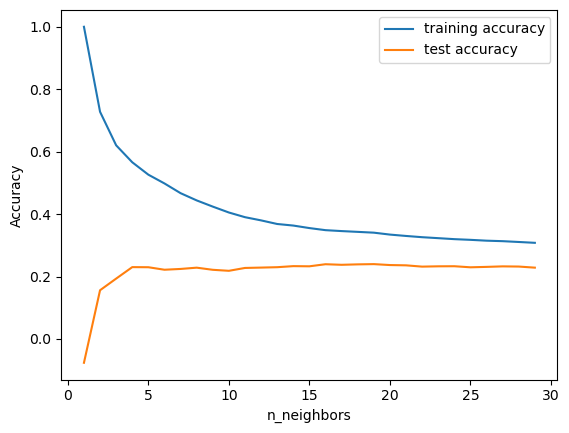

In [42]:
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:

  clf = KNeighborsRegressor(n_neighbors=n_neighbors)

  clf.fit(X_train, Y_train)

  training_accuracy.append(clf.score(X_train, Y_train))

  test_accuracy.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [43]:
KNN = KNeighborsRegressor(n_neighbors = 15)
KNN = KNN.fit(X_train, Y_train)

# Predictions
predictions = KNN.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.23
The intercept of the model is =  -100.88946055783299
The coefficients of the model are =  [-1.50041912e+00  9.47758843e-02  4.18148825e+00 -4.50845292e+00
  1.73260791e+00  1.10822062e+01 -1.10822062e+01  7.36343105e+00
 -5.86274526e+00 -1.50068579e+00  5.02499181e+00 -2.10826469e+00
 -1.20037194e+01  1.38189119e+01 -4.73191961e+00 -1.33537944e+01
 -1.99094063e+01  6.37745537e-01 -2.11843646e+01  5.38098197e+01
 -6.89412973e+00  6.89412973e+00 -2.00016344e+02  1.79622494e+02
  2.03938504e+01 -1.93845591e+01 -2.44926375e+01  4.38771966e+01
 -3.98183405e+00 -1.32221999e+01 -9.37870646e+00 -5.70280488e+00
 -1.05370091e+01 -1.04480714e+01  5.24618534e+01  2.66976614e+00
 -1.86099370e+00 -4.17079425e-01 -2.10952756e-01 -4.22648768e+00
  4.85451986e+00 -3.48634455e+00  4.93012682e+01 -5.81070673e+00
 -1.43162549e+01 -2.70421275e+01  1.35416544e+00  4.69924209e+00
 -5.26631148e+00  5.67069389e-01  5.56565795e-05 -2.63914854e-04
  5.08947063e+00  2.59828282e-01 -4.64347617e

In [44]:
import statsmodels.api as sm

def select_significant_features(X, Y):
    
    """
    Select independent variables with P>|t| < 0.05 from the OLS model summary.
    """
    
    model = sm.OLS(Y, X).fit()
    summary = model.summary()

    significant_features = []
    table = summary.tables[1]
    headers = table.data[0]
    data = table.data[1:]

    p_value_index = headers.index('P>|t|') if 'P>|t|' in headers else headers.index('P>|t| [0.025')

    for row in data:
        p_value = float(row[p_value_index])
        if p_value < 0.05:
            significant_features.append(row[0])

    return significant_features

In [45]:
relevant_features = select_significant_features(X_train, Y_train)
print("Independent variables with P>|t| < 0.05:", relevant_features)

Independent variables with P>|t| < 0.05: ['state_Oregon', 'response_Yes', 'coverage_Extended', 'education_College', 'education_Doctor', 'education_High School or Below', 'employmentstatus_Disabled', 'employmentstatus_Employed', 'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F', 'location_code_Rural', 'location_code_Suburban', 'location_code_Urban', 'marital_status_Divorced', 'marital_status_Married', 'marital_status_Single', 'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1', 'sales_channel_Agent', 'sales_channel_Call Center', 'vehicle_class_Luxury Car', 'vehicle_class_SUV', 'vehicle_class_Sports Car', 'vehicle_size_Medsize', 'income', 'monthly_premium_auto']


In [47]:
adj_df = final[relevant_features].copy()
adj_df

state_Oregon  response_Yes  coverage_Extended  education_College  \
0                0             0                  0                  0   
1                0             0                  1                  0   
2                0             0                  0                  0   
3                0             0                  0                  0   
4                0             0                  0                  0   
...            ...           ...                ...                ...   
9129             0             0                  0                  0   
9130             0             1                  1                  1   
9131             0             0                  1                  0   
9132             0             0                  1                  1   
9133             0             0                  1                  1   

      education_Doctor  education_High School or Below  \
0                    0                               0   
1                    0                               0   
2                    0                               0   
3                    0                               0   
4                    0                               0   
...                ...                             ...   
9129                 0                               0   
9130                 0                               0   
9131                 0                               0   
9132                 0                               0   
9133                 0                               0   

      employmentstatus_Disabled  employmentstatus_Employed  \
0                             0                          1   
1                             0                          0   
2                             0                          1   
3                             0                          0   
4                             0                          1   
...                         ...                        ...   
9129                          0                          1   
9130                          0                          1   
9131                          0                          0   
9132                          0                          1   
9133                          0                          0   

      employmentstatus_Retired  employmentstatus_Unemployed  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            1  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
9129                         0                            0  ...   
9130                         0                            0  ...   
9131                         0                            1  ...   
9132                         0                            0  ...   
9133                         0                            1  ...   

      policy_Personal L3  policy_Special L1  sales_channel_Agent  \
0                      0                  0                    1   
1                      1                  0                    1   
2                      1                  0                    1   
3                      0                  0                    0   
4                      0                  0                    1   
...                  ...                ...                  ...   
9129                   0                  0                    0   
9130                   0                  0                    0   
9131                   0                  0                    0   
9132                   0                  0                    0   
9133                   0                  0                    0   

      sales_channel_Call Center  vehicle_

In [48]:
X = adj_df 
Y = df['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
results2 = models(X, Y)

for model, metrics in results2.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print() 

Model: Linear Regression
R2: 0.76
Root MSE: 137.33
MAE: 94.64

Model: KNeighborsRegressor
R2: 0.45
Root MSE: 208.41
MAE: 146.53

Model: MLPRegressor
R2: 0.68
Root MSE: 159.98
MAE: 115.44



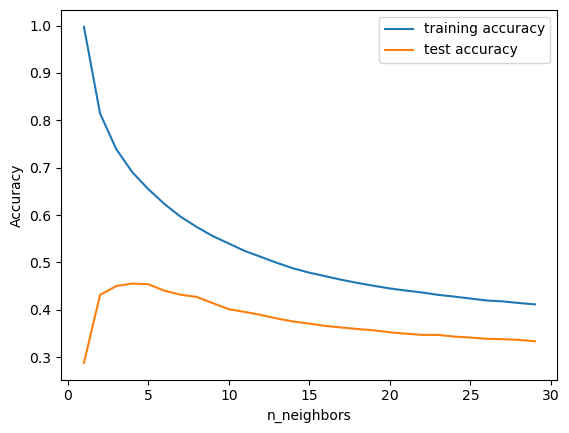

In [53]:
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:

  clf = KNeighborsRegressor(n_neighbors=n_neighbors)

  clf.fit(X_train, Y_train)

  training_accuracy.append(clf.score(X_train, Y_train))
  test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()